In [1]:
from deepface import DeepFace

In [2]:
from matplotlib import pyplot as plt

In [3]:
import pickle

In [4]:
image = 'images.jpg'

In [5]:
result = DeepFace.analyze(img_path=image, actions=['emotion', 'age'])

Action: age: 100%|███████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.40s/it]


In [6]:
result

[{'emotion': {'angry': 0.00414269270549994,
   'disgust': 1.1485193907034841e-07,
   'fear': 0.007993097096914425,
   'happy': 75.5279541015625,
   'sad': 0.19772059749811888,
   'surprise': 0.633222097530961,
   'neutral': 23.62896502017975},
  'dominant_emotion': 'happy',
  'region': {'x': 141,
   'y': 24,
   'w': 62,
   'h': 62,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.9,
  'age': 24}]

In [7]:
result[0]['dominant_emotion']

'happy'

In [8]:
image = plt.imread(image)

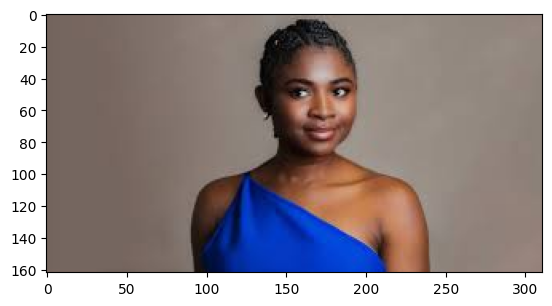

In [9]:
plt.imshow(image)

In [10]:
class ageGenderPrediction:
    def __init__(self):
        pass
        
    def predict_age_gender(self, image):
        results = DeepFace.analyze(img_path=image, actions=['age', 'emotion'])
        return results[0]['dominant_emotion'], results[0]['age']

In [11]:
image = 'images.jpg'

In [12]:
model = ageGenderPrediction()

In [13]:
model.predict_age_gender(image)

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 29.75it/s]


('happy', 24)

#### Exporting as Pickle file

In [14]:
pickle.dump(model, open('age_gender_prediction_model.pkl', 'wb'))

# Testing



In [15]:
import pickle

In [16]:
model = pickle.load(open('age_gender_prediction_model.pkl', 'rb'))

In [17]:
image = 'images.jpg'

In [18]:
result = model.predict_age_gender(image)

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 31.43it/s]


In [19]:
result

('happy', 24)

In [1]:
import cv2
from deepface import DeepFace

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w]
        try:
            results = DeepFace.analyze(img_path=face_roi, actions=['emotion', 'age'], enforce_detection=False)
            
            if results:
                dominant_emotion = results[0]['dominant_emotion']
                age = results[0]['age']
                
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                
                text = f"{dominant_emotion}, {age}"
                cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        except Exception as e:
            print("Error:", e)
    
    cv2.imshow('DeepFace Webcam', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

Action: age: 100%|██████████| 2/2 [00:00<00:00, 41.59it/s]
